In [412]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [413]:
import os

# float
pTime = []
Pressure = []
# int
cycles = []
# string
recipe = ""

ingredients = {
    "al2o3": 0,
    "tio2": 0,
    "hfo2": 0,
    "zro2": 0,
    "zno": 0,
    "ru": 0,
    "pt": 0,
    "ta2o5": 0
}

# Reads through directory and prints out how many of each recipe is in the directory
def readDir():
    path = "/Users/andrew/Desktop/SNF Projects/Tool-Data/Pressure-Data"
    dir_list = os.listdir(path)
    # print("Files in %s: " % path)
    # for _ in dir_list:
    #     print(_)
    # print("\n")
    parseTitles(dir_list)

# Reads through the txt file and prints out the recipe, pressure, time, and cycles
def readFile():
    # string
    # recipe = []
    # loop = []

    path = "/Users/andrew/Desktop/SNF Projects/Tool-Data/Pressure-Data/2024_06_13-19-31_MV standard TiO2 80deg.txt"
    global recipe
    empty = True
    iter = 0
    with open(path, "r") as file:
        for line in file:
            data = line.strip().replace(" - ", " ").split()
            if data[0] == "Pressure":
                continue
            if iter == 1:
                for i in range(data.__len__() - 3):
                    recipe += data[i+3] + " "
                recipe = recipe.strip()
                for key in ingredients:
                    if recipe.find(key) != -1:
                        recipe = key

            empty = False
            pTime.append(float(data[0]))
            Pressure.append(float(data[1]))
            cycles.append(int(data[2]))

            iter += 1
            # Do we need this???
            # recipe.append(data[3])
            # loop.append(data[4])

    # for i in range(pTime.__len__()):
    #     print(pTime[i], Pressure[i], cycles[i]) 
    if not empty:
        print("Completed Cycles:", (cycles[0] - cycles[-1] + 1))


# Parses through the titles of the files and counts how many of each recipe is in the directory
def parseTitles(dir_list):
    for i in dir_list:
        if i.find("Al2O3") != -1:
            ingredients["al2o3"] += 1
        elif i.find("TiO2") != -1:
            ingredients["tio2"] += 1
        elif i.find("HfO2") != -1:
            ingredients["hfo2"] += 1
        elif i.find("ZrO2") != -1:
            ingredients["zro2"] += 1
        elif i.find("ZnO") != -1:
            ingredients["zno"] += 1
        elif i.find("Ru") != -1:
            ingredients["ru"] += 1
        elif i.find("Pt") != -1:
            ingredients["pt"] += 1
        elif i.find("Ta2O5") != -1:
            ingredients["ta2o5"] += 1

        # title = i.lower()
        # if(title.find("al2o3") != -1):
        #     al2o3 +=1
        # elif(title.find("tio2") != -1):
        #     tio2 +=1
       
    print(ingredients)



def main():
    readFile()
    print("Recipe:", recipe.upper())
    readDir()


if __name__ == "__main__":
    main()

Completed Cycles: 70
Recipe: MV STANDARD TIO2 80DEG
{'al2o3': 3, 'tio2': 3, 'hfo2': 0, 'zro2': 0, 'zno': 0, 'ru': 0, 'pt': 0, 'ta2o5': 0}


In [414]:
import matplotlib.pyplot as plt

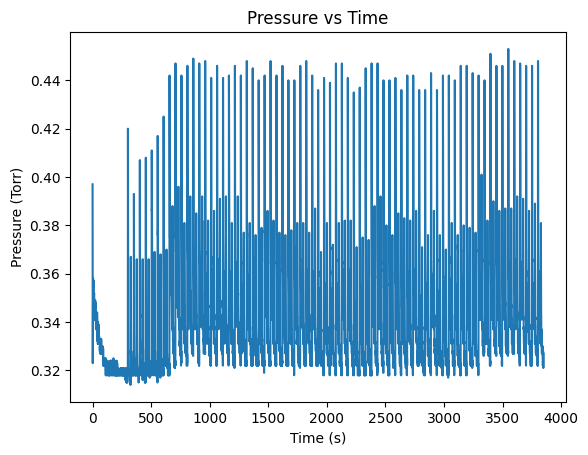

In [415]:
ax = plt.gca()
ax.plot(pTime, Pressure, label='line 1')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pressure (Torr)')
ax.set_title('Pressure vs Time')
plt.show()

In [416]:
import os

# float
hTime = []
trap = []
stopValve = []
outerHeater = []
innerHeater = []
pManifold = []
precursors = [[], [], [], [], []]
numPrecursors = 0
mfc1 = []

# int
cycles = []
# string
recipe = ""

ingredients = {
    "al2o3": 0,
    "tio2": 0,
    "hfo2": 0,
    "zro2": 0,
    "zno": 0,
    "ru": 0,
    "pt": 0,
    "ta2o5": 0
}

# Reads through directory and prints out how many of each recipe is in the directory
def readDir():
    path = "/Users/andrew/Desktop/SNF Projects/Tool-Data/Heating-Data"
    dir_list = os.listdir(path)
    parseTitles(dir_list)

# Reads through the txt file and prints out the recipe, pressure, time, and cycles
def readFile():
    path = "/Users/andrew/Desktop/SNF Projects/Tool-Data/Heating-Data/2024_06_14-09-26_TiO2 - STANDARD.txt"
    global recipe
    global numPrecursors
    empty = True
    iter = 0
    with open(path, "r") as file:
        for line in file:
            data = line.strip().split()
            if data[0] == "Heater":
                continue
            

            empty = False
            hTime.append(float(data[0]))
            trap.append(float(data[1]))
            stopValve.append(float(data[2]))
            outerHeater.append(float(data[3]))
            innerHeater.append(float(data[4]))
            pManifold.append(float(data[5]))
            
            i = 6
            while float(data[i]) < 1000:
                i += 1
                
            numPrecursors = i - 6
            for j in range(numPrecursors):
                precursors[j].append(float(data[j+6]))


            iter += 1

            mfc1.append(float(data[i+1]))
            cycles.append(int(data[i+3]))


            if iter == 1:
                for j in range(i + 4, data.__len__(), 1):
                    recipe += data[j] + " "
                recipe = recipe.strip()
                for key in ingredients:
                    if recipe.find(key) != -1:
                        recipe = key
            # Do we need this???
            # recipe.append(data[3])
            # loop.append(data[4])

    # for i in range(hTime.__len__()):
    #     print(hTime[i], trap[i], stopValve[i], outerHeater[i], innerHeater[i],
    #            pManifold[i], precursors[0][i], precursors[1][i], 
    #             precursors[2][i], precursors[3][i], precursors[4][i]) 
    if not empty:
        print("Completed Cycles:", (cycles[0] - cycles[-1] + 1),  "/", cycles[0])


# Parses through the titles of the files and counts how many of each recipe is in the directory
def parseTitles(dir_list):
    for i in dir_list:
        if i.find("Al2O3") != -1:
            ingredients["al2o3"] += 1
        elif i.find("TiO2") != -1:
            ingredients["tio2"] += 1
        elif i.find("HfO2") != -1:
            ingredients["hfo2"] += 1
        elif i.find("ZrO2") != -1:
            ingredients["zro2"] += 1
        elif i.find("ZnO") != -1:
            ingredients["zno"] += 1
        elif i.find("Ru") != -1:
            ingredients["ru"] += 1
        elif i.find("Pt") != -1:
            ingredients["pt"] += 1
        elif i.find("Ta2O5") != -1:
            ingredients["ta2o5"] += 1

        # title = i.lower()
        # if(title.find("al2o3") != -1):
        #     al2o3 +=1
        # elif(title.find("tio2") != -1):
        #     tio2 +=1
       
    print(ingredients)



def main():
    readFile()
    print("Recipe:", recipe.upper())
    readDir()


if __name__ == "__main__":
    main()

Completed Cycles: 1 / 100
Recipe: TIO2 - STANDARD
{'al2o3': 2, 'tio2': 3, 'hfo2': 0, 'zro2': 0, 'zno': 0, 'ru': 0, 'pt': 0, 'ta2o5': 0}


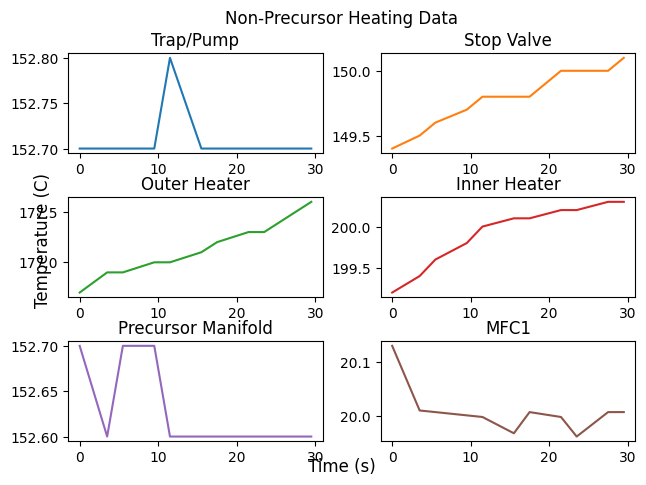

In [417]:


fig, axs = plt.subplots(3, 2)
fig.suptitle('Non-Precursor Heating Data')
fig.tight_layout()
fig.supxlabel('Time (s)')
fig.supylabel('Temperature (C)')
axs[0, 0].plot(hTime, trap, 'tab:blue')
axs[0, 0].set_title('Trap/Pump')
axs[0, 1].plot(hTime, stopValve, 'tab:orange')
axs[0, 1].set_title('Stop Valve')
axs[1, 0].plot(hTime, outerHeater, 'tab:green')
axs[1, 0].set_title('Outer Heater')
axs[1, 1].plot(hTime, innerHeater, 'tab:red')
axs[1, 1].set_title('Inner Heater')
axs[2, 0].plot(hTime, pManifold, 'tab:purple')
axs[2, 0].set_title('Precursor Manifold')
axs[2, 1].plot(hTime, mfc1, 'tab:brown')
axs[2, 1].set_title('MFC1')

plt.show()


11


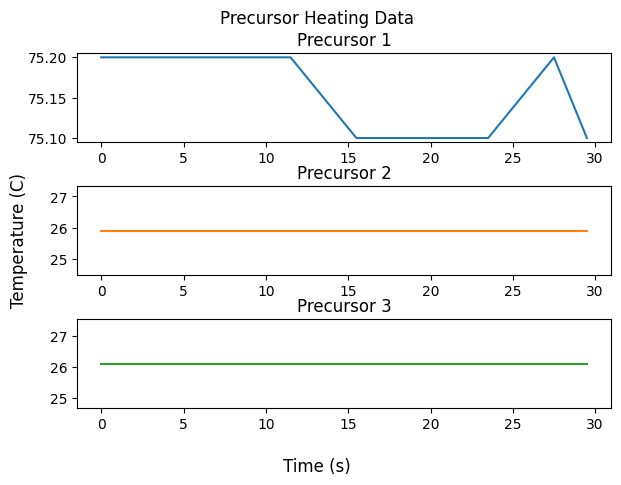

In [418]:
print(precursors[0].__len__())
fig, axs = plt.subplots(numPrecursors, 1)
fig.suptitle('Precursor Heating Data')
fig.supxlabel('Time (s)')
fig.supylabel('Temperature (C)')
fig.tight_layout()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
for i in range(numPrecursors):
    axs[i].plot(hTime, precursors[i], colors[i])
    axs[i].set_title('Precursor ' + str(i + 1))
# for i in range(numPrecursors):
#     axs[i].plot(hTime, precursors[i], 'tab:blue')
#     axs[i].set_title('Precursor ' + str(i + 1))